# Google drive mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q "/content/drive/My Drive/deepfashion/img.zip" 

In [0]:
!cp -r "/content/drive/My Drive/deepfashion/anno" .

In [0]:
!cp -r "/content/drive/My Drive/deepfashion/parts" .
!mv parts/* .
!rmdir parts

# Visualization of input images

In [5]:
import numpy as np
from vis import vis_category, vis_img
from config import CATEGORIES, NUM_IMAGES

category = np.random.choice(CATEGORIES)
idx = np.random.randint(NUM_IMAGES)

Using TensorFlow backend.


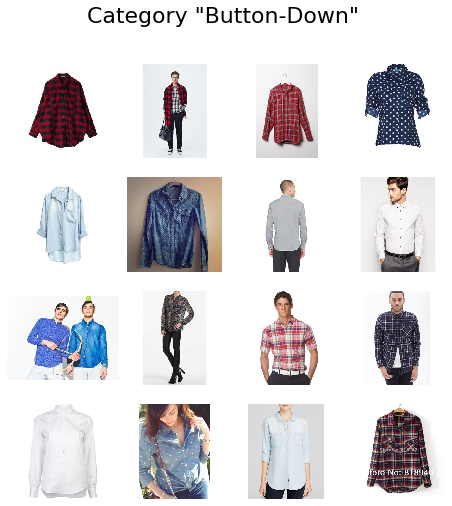

In [6]:
vis_category(name=category)

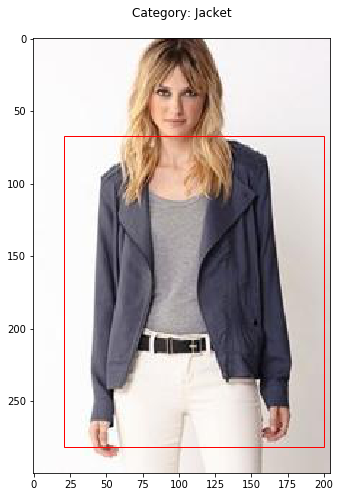

In [7]:
vis_img(idx=idx)

# Split data on train, val and test

In [0]:
!python split.py

# Architecture

In [13]:
from model import create_model

model = create_model()
print(model.summary())













171450368/171446536 [==============================] - 13s 0us/step

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________

# Train

In [0]:
!python train.py

Using TensorFlow backend.






2020-02-26 13:49:55.712929: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-02-26 13:49:55.755894: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000140000 Hz
2020-02-26 13:49:55.758509: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1d40d80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-26 13:49:55.758556: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-26 13:49:55.809631: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-26 13:49:56.316979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
20

# Evaluation

In [14]:
!python eval.py

Using TensorFlow backend.
Found 40000 images belonging to 46 classes.






2020-02-27 05:19:40.354433: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-27 05:19:40.354664: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2ed2a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-27 05:19:40.354693: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-27 05:19:40.356648: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-27 05:19:40.445957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-02-27 05:19:40.446508: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2ed2f40 initialized for platform CUDA (

# Visualization of prediction

Found 40000 images belonging to 46 classes.


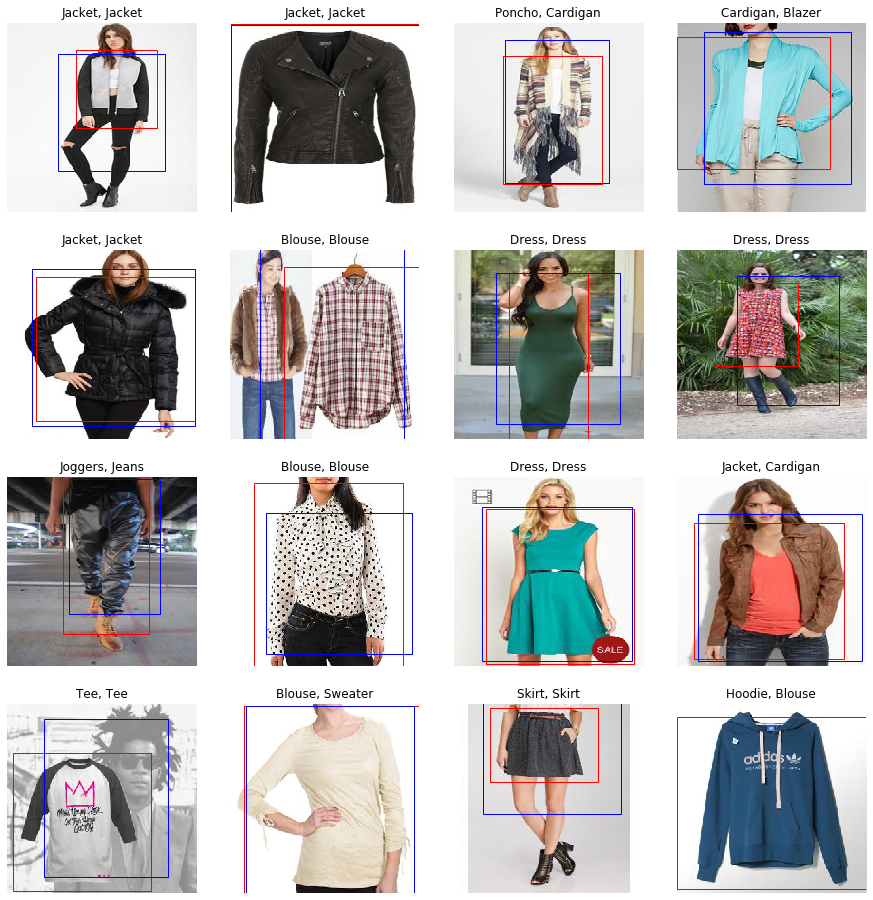

In [24]:
from vis import vis_pred

vis_pred()